In [7]:
!pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

ERROR: Could not find a version that satisfies the requirement agraphviz (from versions: none)
ERROR: No matching distribution found for agraphviz

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'agraphviz'

a ? b : c


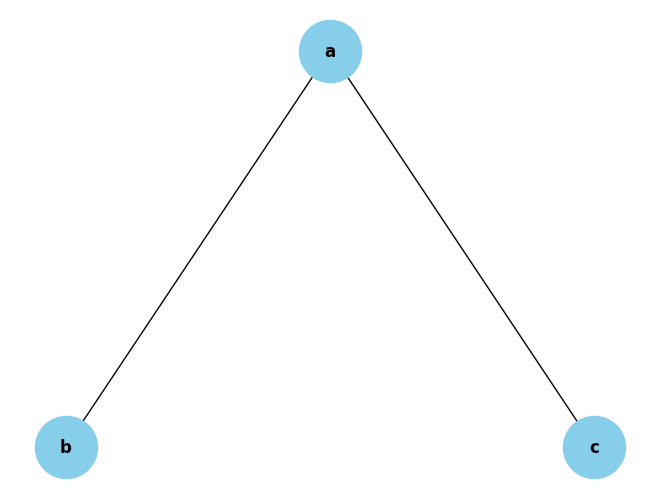

a ? b : c ? d : e


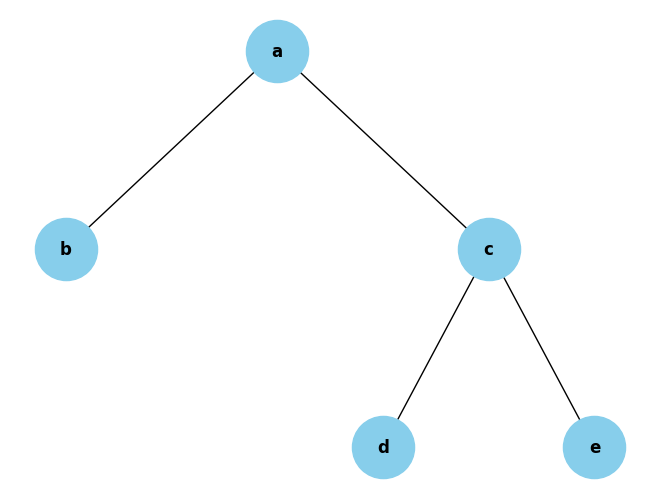

a ? b : c ? d : e ? f : g


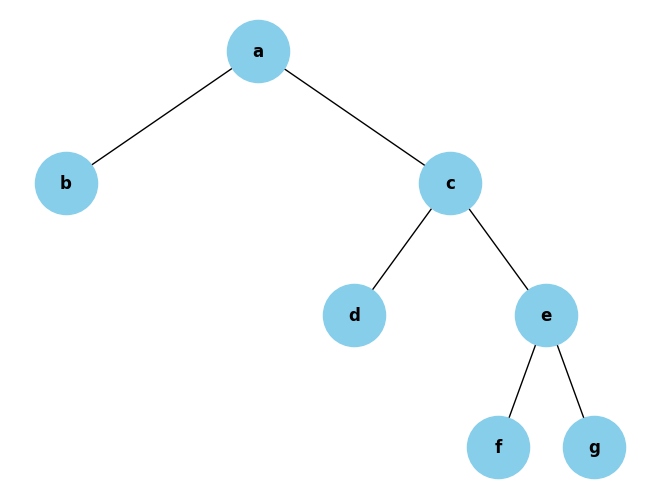

a ? b : c ? d : e ? f : g ? h : i ? j : k ? l : m ? n : o


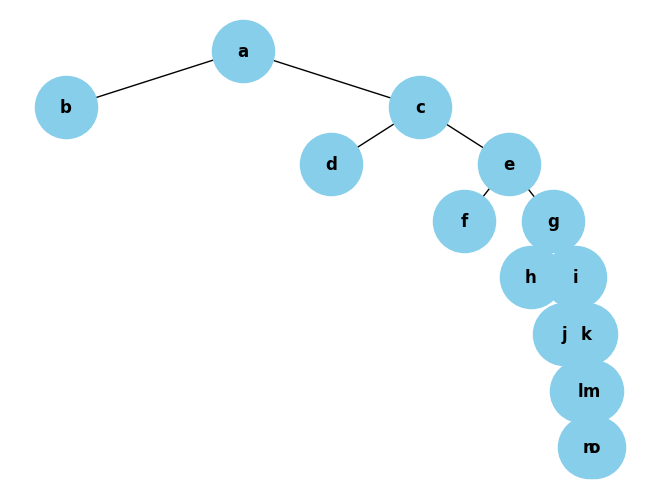

a ? (b : c) ? (d : e) ? (f : g) ? (h : i) ? (j : k) ? (l : m) ? (n : o)a ? (b ? (c ? d : (e ? (f ? g : h) : i)) : (j ? (k ? l : (m ? n : o)) : p)) : (q ? (r ? (s ? t : (u ? v : w)) : x) : (y ? (z ? (A ? B : (C ? D : E)) : (F ? G : H)) : I))


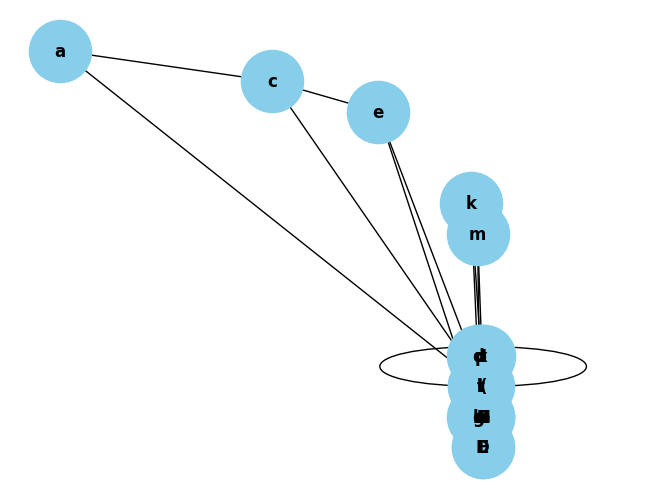

In [24]:
"""
L'objectif de ce script est de passer d'une expression ternaire à un arbre binaire
"""

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def __str__(self):
        return str(self.value)


def ternary_to_binary_tree(expression):
    if not expression:
        return None

    stack = []
    i = 0
    while i < len(expression) and expression[i] == ' ':
        i += 1

    root = TreeNode(expression[i])
    stack.append(root)
    i += 1

    while i < len(expression):
        curr = stack[-1]

        if expression[i] == '?':
            i += 1
            while i < len(expression) and expression[i] == ' ':
                i += 1

            curr.left = TreeNode(expression[i])
            stack.append(curr.left)
        elif expression[i] == ':':
            stack.pop()
            while len(stack) > 0 and stack[-1].right is not None:
                stack.pop()
            if len(stack) == 0:
                break

            i += 1
            while i < len(expression) and expression[i] == ' ':
                i += 1

            curr = stack[-1]
            curr.right = TreeNode(expression[i])
            stack.append(curr.right)
        else:
            # Gérer les autres caractères, tels que les espaces
            i += 1
            continue

        i += 1

    return root


def add_edges_to_graph(G, root):
    if not root:
        return

    if root.left:
        G.add_edge(root.value, root.left.value)
        add_edges_to_graph(G, root.left)

    if root.right:
        G.add_edge(root.value, root.right.value)
        add_edges_to_graph(G, root.right)

def generate_positions(root, pos, x_offset=0, y_offset=0, x_space=1, y_space=1):
    if not root:
        return

    pos[root.value] = (x_offset, y_offset)
    generate_positions(root.left, pos, x_offset - x_space, y_offset - y_space, x_space / 2, y_space)
    generate_positions(root.right, pos, x_offset + x_space, y_offset - y_space, x_space / 2, y_space)

def plot_binary_tree(root):
    G = nx.DiGraph()
    add_edges_to_graph(G, root)

    pos = {}
    generate_positions(root, pos)
    nx.draw(G, pos, with_labels=True, arrows=False, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold')
    plt.show()

inp = [
    "a ? b : c",
    "a ? b : c ? d : e",
    "a ? b : c ? d : e ? f : g",
    "a ? b : c ? d : e ? f : g ? h : i ? j : k ? l : m ? n : o",
    "a ? (b : c) ? (d : e) ? (f : g) ? (h : i) ? (j : k) ? (l : m) ? (n : o)"
    "a ? (b ? (c ? d : (e ? (f ? g : h) : i)) : (j ? (k ? l : (m ? n : o)) : p)) : (q ? (r ? (s ? t : (u ? v : w)) : x) : (y ? (z ? (A ? B : (C ? D : E)) : (F ? G : H)) : I))"
]

for i in inp:
    print(i)
    binary_tree = ternary_to_binary_tree(i)
    plot_binary_tree(binary_tree)
